In [1]:
%load_ext autoreload
%autoreload 2

import sys
 
# setting path
sys.path.append('../read_data/')

In [2]:
from getData import read_data, label_dimensions_to_point_form, resize_images_and_labels

In [3]:
import cv2
import matplotlib.pyplot as plt

import numpy as np

In [4]:
file_name = '04886_MVL'
image_path = '/Users/usmanr/workspace/fisheye_images/rgb_images/'
label_path = '/Users/usmanr/workspace/fisheye_images/box_2d_annotations'

In [18]:
image, label = read_data(file_name, image_path, label_path)

image, label = resize_images_and_labels(image, label)

In [19]:
300 * 1100 / 1200

275.0

In [20]:
label

[[1, 257, 93, 285, 133],
 [1, 270, 233, 280, 249],
 [1, 280, 184, 285, 197],
 [2, 219, 30, 226, 40],
 [2, 255, 78, 260, 84],
 [2, 277, 148, 284, 153],
 [5, 213, 5, 220, 15],
 [1, 60, 0, 137, 55],
 [1, 279, 211, 283, 220]]

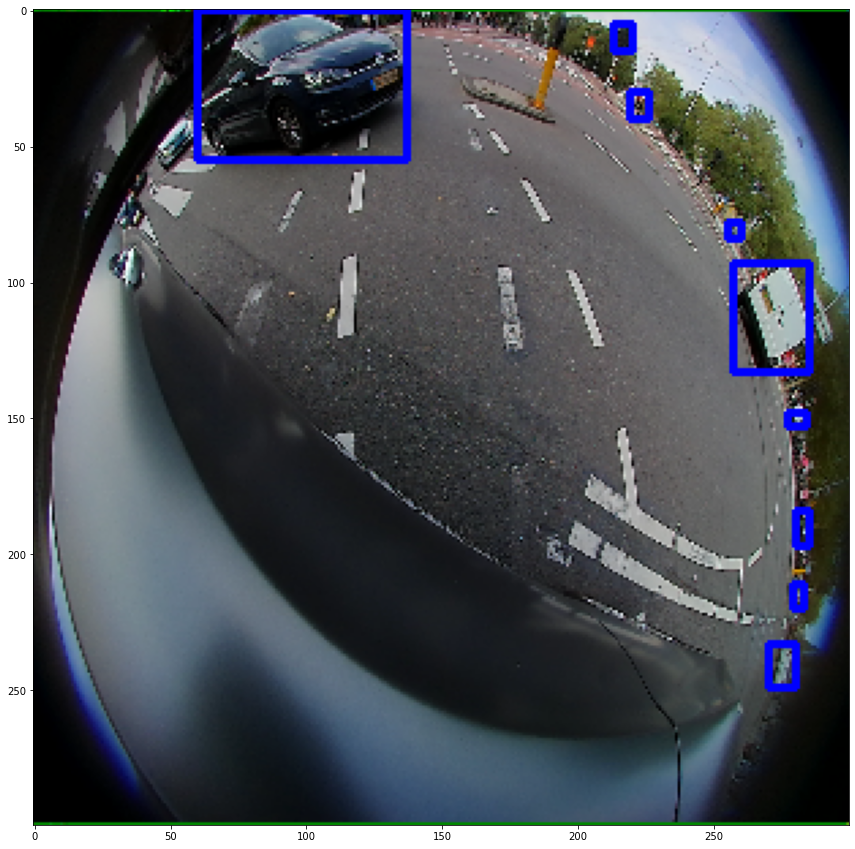

In [22]:
plt.figure(figsize=(15, 15))

for _, x_min, y_min, x_max, y_max in label:
    image = cv2.rectangle(image, (x_min, y_min),
                          (x_max, y_max), (0, 0, 255), 1)

plt.imshow(image)

In [ ]:
label_dimensions_to_point_form(label)

In [ ]:
image.shape

In [50]:
def helperAmbiguousMeasurements(measuringCups, low, high, memo = {}):
    if (low, high) in memo:
        return memo[(low, high)]
    if low <= 0 and high >= 0:
        return True

    if (high < 0 and low < 0) or low > high:
        return False

    for pouredVolume in measuringCups:
        memo[(low, high)] = helperAmbiguousMeasurements(measuringCups, 
                                                         low - pouredVolume[0], 
                                                         high - pouredVolume[1], 
                                                         memo
                                                        )
        if memo[(low, high)]:
            return memo[(low, high)]
    return memo[(low, high)]

def ambiguousMeasurements(measuringCups, low, high):
    # Write your code here.
    memo = {}
    helperAmbiguousMeasurements(measuringCups, low, high, memo)
    print(len(memo))
    print(memo)

measuringCups = [
    [200, 210],
    [450, 465],
    [800, 850]
]
measuringCups = [
    [1, 1],
    [2, 2]
]
low = 10
high= 12

ambiguousMeasurements(measuringCups, low, high)

10
{(1, 3): True, (2, 4): True, (3, 5): True, (4, 6): True, (5, 7): True, (6, 8): True, (7, 9): True, (8, 10): True, (9, 11): True, (10, 12): True}


In [40]:
measuredLow = 0
measuredHigh = 0

low <= measuredLow and measuredLow <= high and low <= measuredHigh and measuredHigh <= high

False